# ANÁLISE DE AVALIAÇÕES SOBRE VINHOS ATRAVÉS DO PROCESSAMENTO DE LINGUAGEM NATURAL

Este projeto acadêmico visa desenvolver uma abordagem de ciência de dados, aplicando conhecimentos adquiridos em disciplinas como Análise Estatística Preditiva, Aprendizado de Máquina e Aquisição e Preparação de Dados. O objetivo é aplicar essas habilidades na prática e, nesse sentido, o foco será na análise de sentimentos das avaliações online relacionadas ao mundo dos vinhos. Para isso, os dados que serão utilizados são do site Wine  Enthusiast e, com isso, busca-se identificar quais vinhos têm maior potencial comercial com base nas avaliações dos consumidores. O projeto envolverá técnicas como análise exploratória de dados, processamento de linguagem natural (NLP) e aprendizado de máquina, incluindo etapas como coleta de dados, pré-processamento textual e análise de correlações. O objetivo final é ajudar a empresas desse segmento a tomar decisões sobre quais rótulos incluir em seu catálogo, melhorando assim sua estratégia de compras e a satisfação do cliente.

Base de dados disponível em: https://drive.google.com/file/d/1CsmogEPBza1_YNnNUh2g34GD811TTgSn/view?usp=sharing

**Projeto Aplicado 2 - Grupo Nave:**

AMANDA SCHWANTES MAIA TIA - 10922519963

ELAINE THAMIRES PEREIRA TIA - 10922517650

GIOVANA VIEIRA DA SILVA TIA - 10922520791

IAGO FONSECA MARINHO PEREIRA TIA - 10922500138

MURILO GUIMARAES TIA - 10922505458

**Github**: https://github.com/NaveProjetoI/Projeto-Aplicado-II

#Importando Bibliotecas

In [ ]:
pip install wordcloud

In [ ]:
#Manipulação e Visualização dos Dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import plotly.express as px
import re
from sklearn import metrics

#Nuvem de Palavras

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

#Modelo de IA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Carregamento e Pré-Processamento dos Dados

In [ ]:
#df = pd.read_csv('/work/winemag-data-2017-2020.csv') #Caminho DeepNote
df = pd.read_csv('/content/winemag-data-2017-2020.csv') #Caminho Colab
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",NaN,87,13.0,Rahoveci Valley,NaN,NaN,Jeff Jenssen,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
4,Italy,"A blend of organically cultivated Groppello, M...",San'Emiliano Chiaretto,87,13.0,Lombardy,Valtènesi,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Pratello 2016 San'Emiliano Chiaretto Rosato (V...,Rosato,2016,Pratello


In [ ]:
df.describe()

,points,price
count,81115.000000,76468.000000
mean,89.383135,39.181618
std,2.918882,48.177663
min,80.000000,4.000000
25%,87.000000,19.000000
50%,89.000000,29.000000
75%,91.000000,47.000000
max,100.000000,3400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                81110 non-null  object 
 1   description            81115 non-null  object 
 2   designation            59796 non-null  object 
 3   points                 81115 non-null  int64  
 4   price                  76468 non-null  float64
 5   province               81110 non-null  object 
 6   region_1               68202 non-null  object 
 7   region_2               31221 non-null  object 
 8   taster_name            80965 non-null  object 
 9   taster_photo           80965 non-null  object 
 10  taster_twitter_handle  80039 non-null  object 
 11  title                  81115 non-null  object 
 12  variety                81115 non-null  object 
 13  vintage                81115 non-null  object 
 14  winery                 81115 non-null  object 
dtypes:

In [ ]:
std_price = df['price'].std().round(2)
var_price = df['price'].var().round(2)
quantile_25_price = df['price'].quantile(0.25)
quantile_75_priced = df['price'].quantile(0.75)
print(f"Estatísticas para 'price':\n" \
    f"Desvio Padrão: {std_price}\n" \
    f"Variância: {var_price}\n" \
    f"1ª Quartil: {quantile_25_price}\n" \
    f"3ª Quartil: {quantile_75_priced}")

Estatísticas para 'price':
Desvio Padrão: 48.18
Variância: 2321.09
1ª Quartil: 19.0
3ª Quartil: 47.0


In [ ]:
std_points = df['points'].std().round(2)
var_points = df['points'].var().round(2)
quantile_25_points = df['points'].quantile(0.25)
quantile_75_points = df['points'].quantile(0.75)
print(f"Estatísticas para 'points':\n" \
    f"Desvio Padrão: {std_points}\n" \
    f"Variância: {var_points}\n" \
    f"1ª Quartil: {quantile_25_points}\n" \
    f"3ª Quartil: {quantile_75_points}")

Estatísticas para 'points':
Desvio Padrão: 2.92
Variância: 8.52
1ª Quartil: 87.0
3ª Quartil: 91.0


In [ ]:
#queremos extrair as descrições onde points é igual a 80
descriptions_80_points = df[df['points'] == 80]['description']

# Se você deseja converter as descrições para uma lista
#descriptions_list_80_points = descriptions_80_points.tolist()

# Exibir as descrições
descriptions_80_points.head(50)


474      An undeniable raisiny nose leads to a soupy, f...
475      Aromas suggest compost, murky grit and olive. ...
6328     Reduced, malted, raisiny aromas in this blend ...
8918     There isn't much to love about this weedy abra...
9435     This diluted wine opens with aromas suggesting...
9436     Funky, heavily pickled aromas lack clarity, ch...
10273    This no-sulfur wine from a hot vintage is prem...
10656    Rusty in color, with aromas of compost and rot...
10657    Other than a strange note of mustard, there's ...
17185    Candied-raspberry aromas are soapy and strange...
22080    Pinched austere aromas of cat pee and oily swe...
22081    This smells confected—neither natural nor conv...
22082    This yeasty funky Chardonnay is on its last le...
22327    Chemicalized aromas of lemon peel and turpenti...
22328    This red-colored barrel-fermented rosé of Temp...
22329    Muddled candied aromas smell uniquely unnatura...
23574    Stewy, soupy aromas are hardly inviting, while.

In [ ]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_photo',
       'taster_twitter_handle', 'title', 'variety', 'vintage', 'winery'],
      dtype='object')

In [ ]:
df.shape

(81115, 15)

In [ ]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_photo',
       'taster_twitter_handle', 'title', 'variety', 'vintage', 'winery'],
      dtype='object')

In [ ]:
df.isnull().sum()

country                      5
description                  0
designation              21319
points                       0
price                     4647
province                     5
region_1                 12913
region_2                 49894
taster_name                150
taster_photo               150
taster_twitter_handle     1076
title                        0
variety                      0
vintage                      0
winery                       0
dtype: int64

In [ ]:
#Selecionando colunas que serão utilizadas, já que algumas não serão necessárias ou até possuem muitos valores ausentes.

df= df[['country', 'description', 'points', 'price', 'province', 'title', 'variety', 'vintage', 'winery']]
df.columns

Index(['country', 'description', 'points', 'price', 'province', 'title',
       'variety', 'vintage', 'winery'],
      dtype='object')

In [ ]:
df.head()

,country,description,points,price,province,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,87,14.0,Douro,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",87,25.0,California,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,87,14.0,Lechkhumi,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",87,13.0,Rahoveci Valley,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
4,Italy,"A blend of organically cultivated Groppello, M...",87,13.0,Lombardy,Pratello 2016 San'Emiliano Chiaretto Rosato (V...,Rosato,2016,Pratello


In [ ]:
df.isnull().sum()

country           5
description       0
points            0
price          4647
province          5
title             0
variety           0
vintage           0
winery            0
dtype: int64

In [ ]:
#Removendo os valores ausentes e verifcando o tamanho. Neste caso, houve perda de aproximadamente 5,74% dos dados.
df.dropna(inplace = True)
df.shape

(76464, 9)

In [ ]:
display(df)

,country,description,points,price,province,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,87,14.0,Douro,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",87,25.0,California,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,87,14.0,Lechkhumi,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",87,13.0,Rahoveci Valley,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
4,Italy,"A blend of organically cultivated Groppello, M...",87,13.0,Lombardy,Pratello 2016 San'Emiliano Chiaretto Rosato (V...,Rosato,2016,Pratello
...,...,...,...,...,...,...,...,...,...
81110,Portugal,"A blend of Syrah and Alicante Bouschet, this i...",94,55.0,Alentejo,Symington Family Estates 2017 Quinta da Fonte ...,Portuguese Red,2017,Symington Family Estates
81111,US,Fans of Paso Robles richness should flock to t...,94,52.0,California,Herman Story 2017 Nuts & Bolts Syrah (California),Syrah,2017,Herman Story
81112,Italy,"Wild berry, blue flower, crushed herb, camphor...",94,40.0,Tuscany,Boscarelli 2016 Vino Nobile di Montepulciano,Red Blends,2016,Boscarelli
81113,Italy,"Enveloping and delicious, this full-bodied, ve...",94,113.0,Tuscany,Dei 2015 Madonna delle Querce (Vino Nobile di...,Sangiovese,2015,Dei


#Visualização dos Dados

,variety,count
0,Pinot Noir,8881
1,Chardonnay,6340
2,Cabernet Sauvignon,5036
3,Red Blends,4863
4,Bordeaux-style Red Blend,4110
5,Rosé,3279
6,Riesling,3033
7,Sauvignon Blanc,2847
8,Syrah,2091
9,Sangiovese,1724


<function matplotlib.pyplot.show(close=None, block=None)>

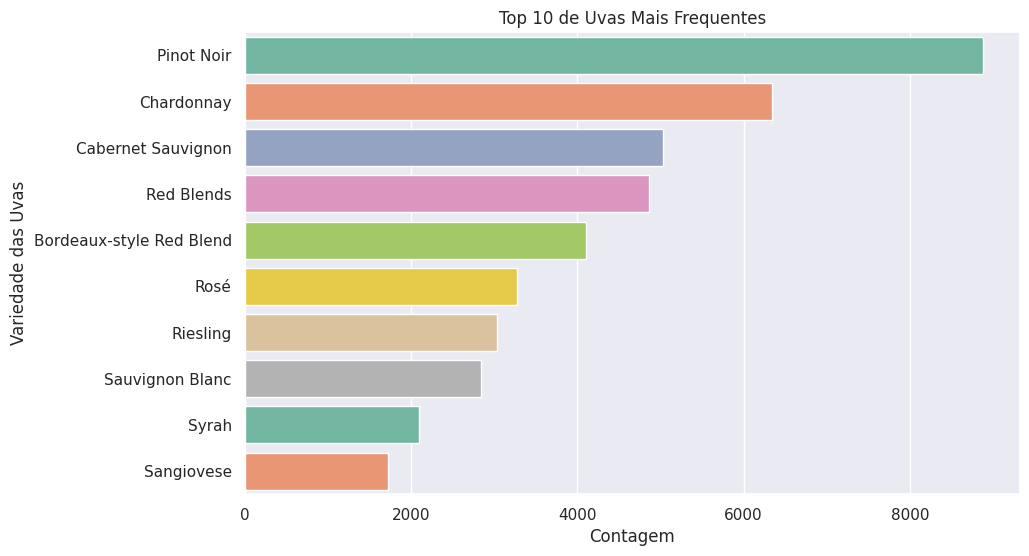

In [ ]:
#Visualização da variedade de uvas

seleção_10_uvas = df['variety'].value_counts()
top_10_uvas = pd.DataFrame({'variety': seleção_10_uvas.index[:10], 'count': seleção_10_uvas.values[:10]})
display(top_10_uvas)

cores = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='variety', data= top_10_uvas, orient='h', palette= cores)
plt.xlabel('Contagem')
plt.ylabel('Variedade das Uvas')
plt.title('Top 10 de Uvas Mais Frequentes')
plt.show

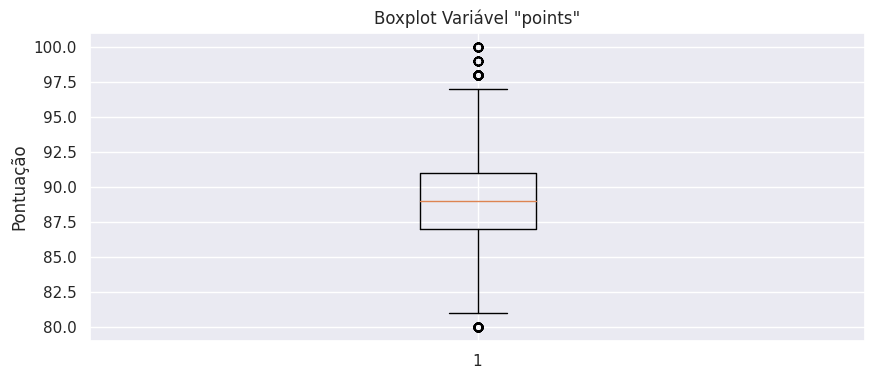

In [ ]:
# Boxplot da variável 'points'.

plt.figure(figsize=(10, 4))
plt.boxplot(df['points'])
plt.title('Boxplot Variável "points"')
plt.ylabel('Pontuação')
plt.show()

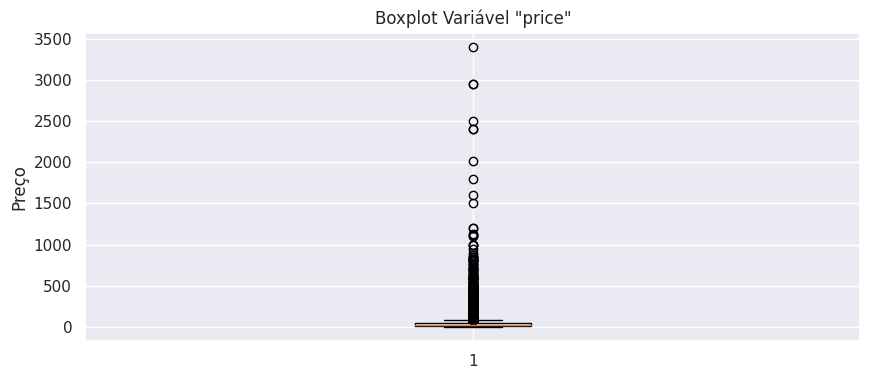

In [ ]:
# Boxplot da variável 'price'.

plt.figure(figsize=(10, 4))
plt.boxplot(df['price'])
plt.title('Boxplot Variável "price"')
plt.ylabel('Preço')
plt.show()

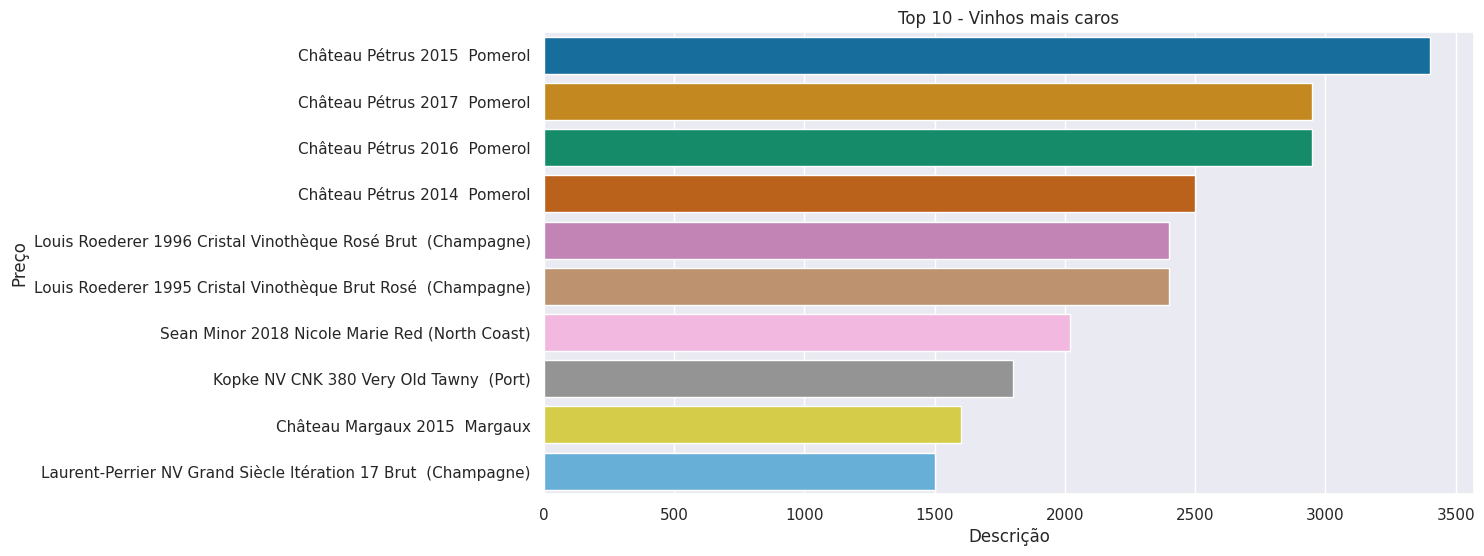

'\npaletas de cores disponíveis no Seaborn:\n\n    "deep"\n    "muted"\n    "pastel"\n    "dark"\n    "colorblind"\n'

In [ ]:
# Visualização dos Vinhos mais caros. (TOP10)
df_sorted = df.sort_values(by = "price", ascending=False)
top_vinhos_caros = df_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='title', data=top_vinhos_caros, orient='h', palette= 'colorblind')
plt.xlabel('Descrição')
plt.ylabel('Preço')
plt.title('Top 10 - Vinhos mais caros')
plt.show()

'''
paletas de cores disponíveis no Seaborn:

    "deep"
    "muted"
    "pastel"
    "dark"
    "colorblind"
'''

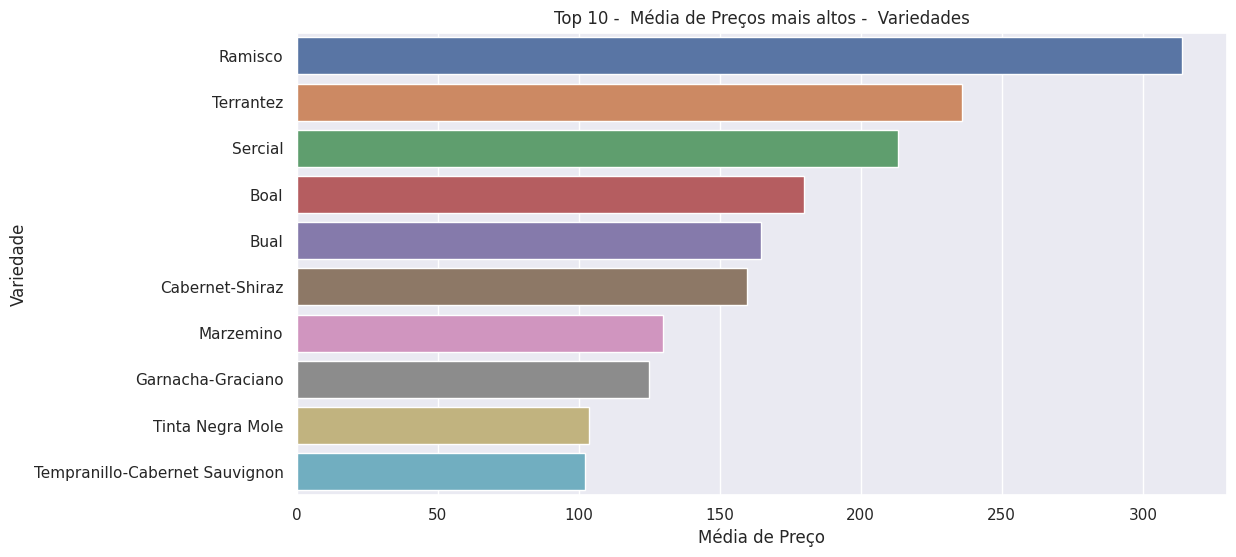

In [ ]:
# Visualização de Média de preços mais altos por variedade. (TOP10)

df_agrupado= df.groupby('variety')['price'].mean().reset_index()
df_sorted_2 = df_agrupado.sort_values(by='price', ascending=False)
top_media_variedade = df_sorted_2.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='variety', data=top_media_variedade, orient='h', palette= 'deep')
plt.xlabel('Média de Preço')
plt.ylabel('Variedade')
plt.title('Top 10 -  Média de Preços mais altos -  Variedades')
plt.show()

In [ ]:
top_media_variedade

,variety,price
462,Ramisco,314.000000
586,Terrantez,236.000000
520,Sercial,213.333333
56,Boal,180.000000
66,Bual,164.666667
96,Cabernet-Shiraz,159.800000
321,Marzemino,130.000000
208,Garnacha-Graciano,125.000000
595,Tinta Negra Mole,103.750000
578,Tempranillo-Cabernet Sauvignon,102.200000


<function matplotlib.pyplot.show(close=None, block=None)>

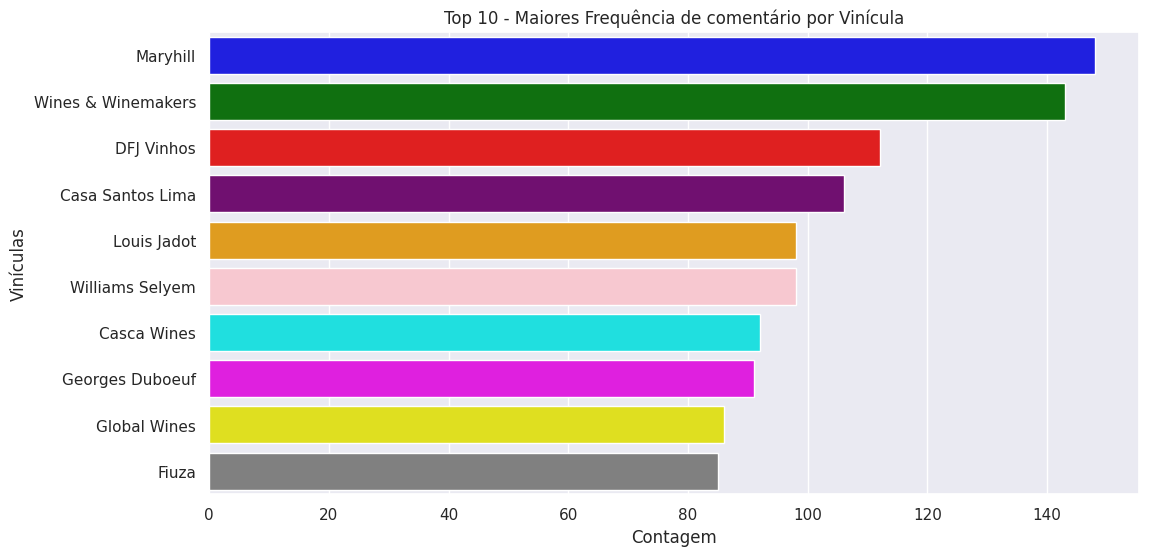

In [ ]:
# Visualização de maiores frequências de comentário por vinícula
cores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'gray']
frequencia_winery = df['winery'].value_counts()
top_winery_frequencia = pd.DataFrame({'winery': frequencia_winery.index[:10], 'count': frequencia_winery.values[:10]})
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='winery', data=top_winery_frequencia, orient='h', palette = cores)
plt.xlabel('Contagem')
plt.ylabel('Vinículas')
plt.title('Top 10 - Maiores Frequência de comentário por Vinícula')
plt.show

In [ ]:
#Visualização dos países

seleção_paises = df['country'].value_counts()
top_paises = pd.DataFrame({'country': seleção_paises.index[:10], 'count': seleção_paises.values[:10]})
display(top_paises)

,country,count
0,US,31892
1,France,16074
2,Italy,9550
3,Portugal,3810
4,Spain,3375
5,Austria,2010
6,Australia,1837
7,Argentina,1743
8,Chile,1554
9,Germany,1515


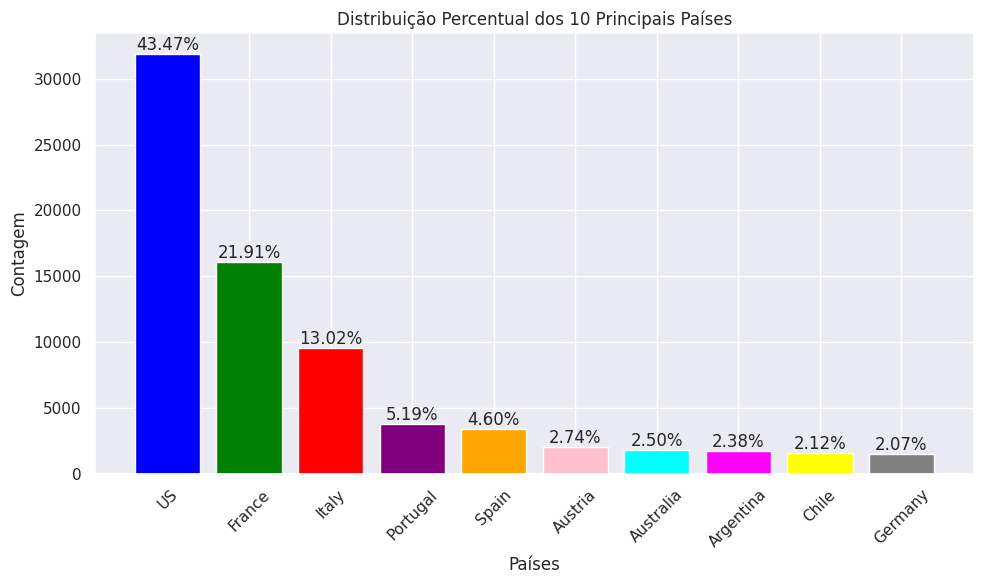

In [ ]:
seleção_paises = df['country'].value_counts()
top_paises = pd.DataFrame({'country': seleção_paises.index[:10], 'count': seleção_paises.values[:10]})



cores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'gray']
total = top_paises['count'].sum()
top_paises['percent'] = (top_paises['count'] / total) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(top_paises['country'], top_paises['count'], color=cores)
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.title('Distribuição Percentual dos 10 Principais Países')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    percent = top_paises.loc[top_paises['count'] == height, 'percent'].values[0]
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{percent:.2f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
#Visualização das notas por variedade de uva

maiores_notas_por_variedade = df.groupby('variety')['points'].max().reset_index()

# Ordem descrescente
maiores_notas_por_variedade = maiores_notas_por_variedade.sort_values(by='points', ascending=False)

fig = px.bar(maiores_notas_por_variedade, x='points', y='variety', orientation='h',
             title='Maiores Notas por Variedade de Uvas',
             color='points',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Maior Nota', yaxis_title='Variedade de Uvas')
fig.show()


In [ ]:
#Visualização das notas dos consumidores



In [ ]:
#Visualização dos preços



#Classificar avaliações

In [ ]:
#Definindo função para gerar coluna com a classificacao
def classificar_avaliacao(pontuacao):
    if pontuacao >= 98:
        return 'Classic'
    elif 94 <= pontuacao <= 97:
        return 'Superb'
    elif 90 <= pontuacao <= 93:
        return 'Excellent'
    elif 87 <= pontuacao <= 89:
        return 'Very Good'
    elif 83 <= pontuacao <= 86:
        return 'Good'
    else:
        return 'Acceptable'

df['classificacao'] = df['points'].apply(classificar_avaliacao)

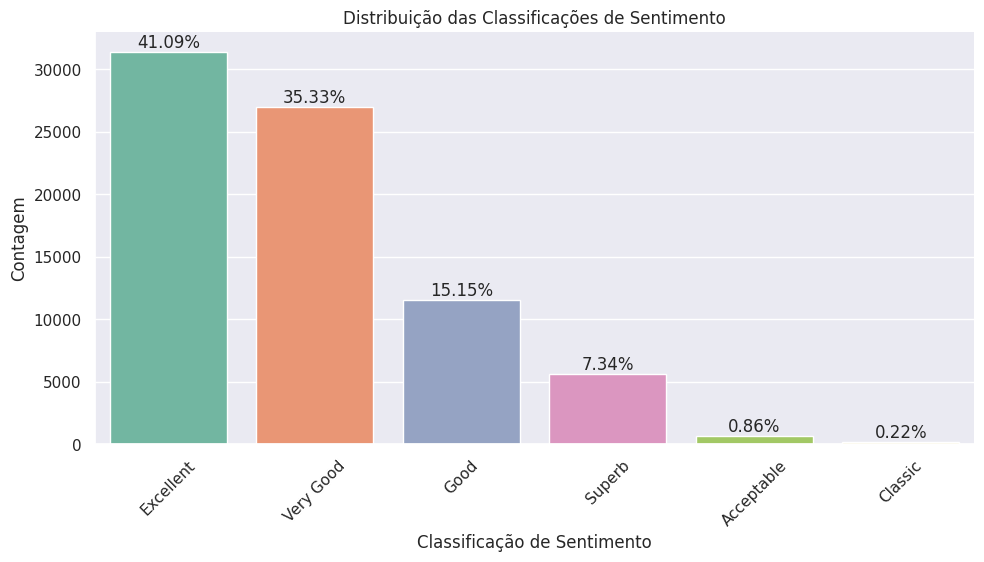

In [ ]:
#Distribuição das classificações
ordem = df['classificacao'].value_counts().index

sns.set(style="darkgrid")
g = sns.catplot(x='classificacao', data=df, kind='count', palette='Set2', height=5, aspect=2, order=ordem)

g.set(xlabel='Classificação de Sentimento', ylabel='Contagem')
plt.title('Distribuição das Classificações de Sentimento')
plt.xticks(rotation=45)

eixo = g.ax
total = float(len(df))
for barra in eixo.patches:
    altura = barra.get_height()
    eixo.annotate(f'{altura / total:.2%}', (barra.get_x() + barra.get_width() / 2., altura),
                  ha='center', va='bottom')
plt.show()


In [ ]:
#Exibindo colunas
df.columns

Index(['country', 'description', 'points', 'price', 'province', 'title',
       'variety', 'vintage', 'winery', 'classificacao'],
      dtype='object')

In [ ]:
#Exibindo contagem da coluna de clasificacao
df['classificacao'].value_counts()

Excellent     31421
Very Good     27017
Good          11582
Superb         5614
Acceptable      658
Classic         172
Name: classificacao, dtype: int64

#Nuvem de Palavras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


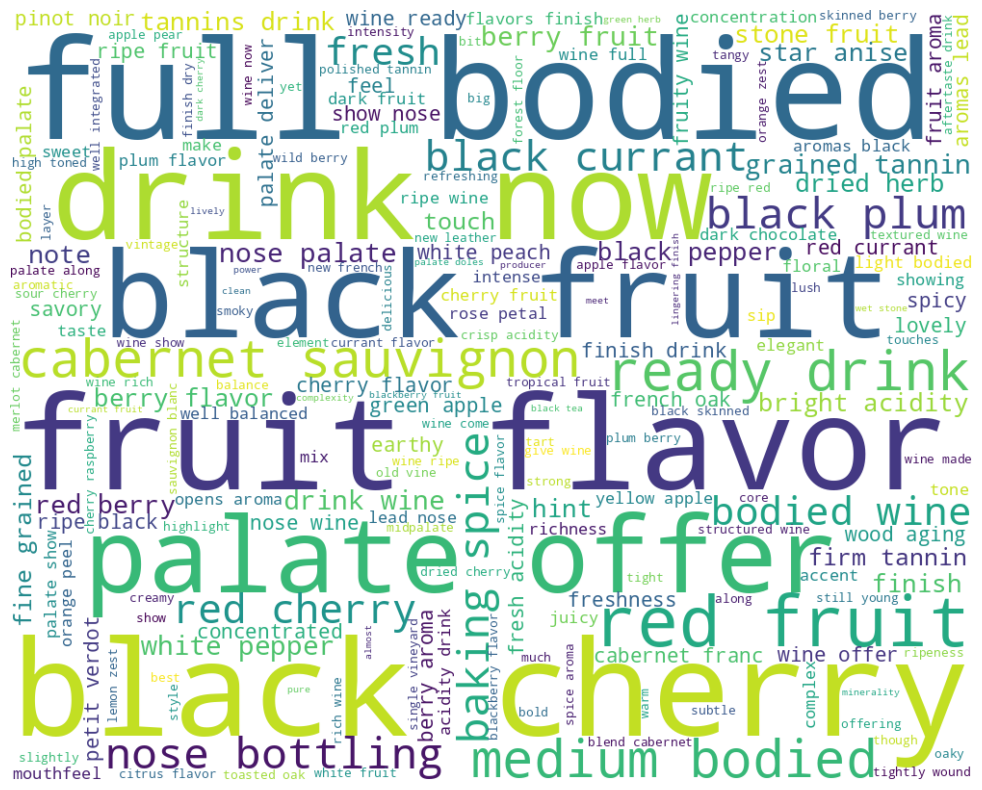

In [ ]:
#Nuvem de Palavras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Carregando a lista de stopwords contemplada na biblioteca do NLTK
stopwordsnltk = nltk.corpus.stopwords.words('english')

# Supondo que você tenha um DataFrame chamado df com uma coluna 'text'
# Substitua 'text' pelo nome da coluna que contém suas frases
words = []
for i in df['description']:
    for p in i.lower().split():
        if p not in stopwordsnltk:
            words.append(p)

words = ' '.join(words)  # Unir as palavras em uma única string

# Criando a variável WordCloud
wordcloud = WordCloud(width=1000, height=800,background_color='white', margin=0).generate(words)

# Exibir a nuvem de palavras
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


#texto = ' '.join(df['description'])

#adjetivos_positivos = ['great', 'delicious', 'good','tasty','my favorite','fruity',
#                      'delightful','loved','enjoyed','spicy','amazing','light',
#                      'refreshing','soft tannin', 'rich', 'mouthwatering ', 'mineral', 'smooth']
#wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=1.0).generate(' '.join(adjetivos_positivos))
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [ ]:
'''
# Baixar os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Suponha que você tenha um DataFrame chamado df com uma coluna 'description'
# Certifique-se de substituir 'seu_dataframe.csv' pelo caminho correto do seu arquivo CSV
df = pd.read_csv('winemag-data-2017-2020.csv')

# Função para extrair adjetivos de uma descrição
def extract_adjectives(text):
    words = word_tokenize(text)
    tagged_words = nltk.pos_tag(words)

    # Extrair adjetivos (JJ e JJR são etiquetas para adjetivos em inglês)
    adjectives = [word for word, tag in tagged_words if tag in ['JJ', 'JJR']]
    return adjectives

# Aplicar a função de extração de adjetivos na coluna 'description'
df['adjectives'] = df['description'].apply(extract_adjectives)

# Contar a frequência dos adjetivos
adjective_counts = df['adjectives'].apply(lambda x: pd.Series(x)).stack().value_counts()
print(adjective_counts)
'''

"\n# Baixar os recursos necessários do NLTK\nnltk.download('punkt')\nnltk.download('averaged_perceptron_tagger')\n\n# Suponha que você tenha um DataFrame chamado df com uma coluna 'description'\n# Certifique-se de substituir 'seu_dataframe.csv' pelo caminho correto do seu arquivo CSV\ndf = pd.read_csv('winemag-data-2017-2020.csv')\n\n# Função para extrair adjetivos de uma descrição\ndef extract_adjectives(text):\n    words = word_tokenize(text)\n    tagged_words = nltk.pos_tag(words)\n\n    # Extrair adjetivos (JJ e JJR são etiquetas para adjetivos em inglês)\n    adjectives = [word for word, tag in tagged_words if tag in ['JJ', 'JJR']]\n    return adjectives\n\n# Aplicar a função de extração de adjetivos na coluna 'description'\ndf['adjectives'] = df['description'].apply(extract_adjectives)\n\n# Contar a frequência dos adjetivos\nadjective_counts = df['adjectives'].apply(lambda x: pd.Series(x)).stack().value_counts()\nprint(adjective_counts)\n"

Preparando os dados para Análise de Sentimento com NLTK

In [ ]:
#Separando apenas descrição e classificação
df_modelo = df[['description', 'classificacao']]

df_modelo.head(20)

,description,classificacao
0,This is a deliciously creamy wine with light w...,Very Good
1,"Black plum juice, black pepper, caramel and sm...",Very Good
2,Aromas of green apple and white flowers prepar...,Very Good
3,"This wine has aromas of black berry, dried red...",Very Good
4,"A blend of organically cultivated Groppello, M...",Very Good
5,"The wine, a blend of Antão Vaz, Arinto and Sir...",Very Good
6,"Big, bold and oaky, this wine smells like butt...",Very Good
7,Balanced aromas of green herbs and citrus zest...,Very Good
9,This wine made from an aromatic indigenous Tur...,Very Good
10,The nose is very shy but the palate holds crea...,Very Good


In [ ]:
#Definindo stopwords
stopwordsnltk = nltk.corpus.stopwords.words('english')

np.transpose(stopwordsnltk)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#Definindo função para remover stopwords
def remove_stopwords(texto):
        palavras = texto.split()  # Dividir o texto em palavras
        palavras_filtradas = [palavra for palavra in palavras if palavra.lower() not in stopwordsnltk]
        return ' '.join(palavras_filtradas)  # Juntar as palavras de novo em uma string

In [ ]:
#Removendo stopwords
df_modelo['description'] = df_modelo['description'].apply(remove_stopwords)

<ipython-input-96-23701f8a08ec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Atribuindo novo dataset após remoção dos stopwords e exibindo
df_modelo_sem_stop = df_modelo[['description', 'classificacao']]
df_modelo_sem_stop.head(20)

,description,classificacao
0,deliciously creamy wine light white fruits ref...,Very Good
1,"Black plum juice, black pepper, caramel smoke ...",Very Good
2,Aromas green apple white flowers prepare palat...,Very Good
3,"wine aromas black berry, dried red raspberry b...",Very Good
4,"blend organically cultivated Groppello, Marzem...",Very Good
5,"wine, blend Antão Vaz, Arinto Siria, comes Vid...",Very Good
6,"Big, bold oaky, wine smells like buttered toas...",Very Good
7,Balanced aromas green herbs citrus zest fresh ...,Very Good
9,wine made aromatic indigenous Turkish grape of...,Very Good
10,nose shy palate holds creamy candy-like strawb...,Very Good


In [ ]:
#Definição de função para remover pontuação
def remover_pontuacao(texto):
    regex_pontuacao = re.compile(r'[\W_]+')
    return regex_pontuacao.sub(' ', texto)

In [ ]:
#Removendo pontuação
df_modelo_sem_stop['description'] = df_modelo_sem_stop['description'].apply(remover_pontuacao)

In [ ]:
#Atribuindo novo dataset após remoção da pontuacao e exibindo
df_modelo_sem_pontuacao = df_modelo_sem_stop[['description', 'classificacao']]
df_modelo_sem_pontuacao.head(20)

,description,classificacao
0,deliciously creamy wine light white fruits ref...,Very Good
1,Black plum juice black pepper caramel smoke ma...,Very Good
2,Aromas green apple white flowers prepare palat...,Very Good
3,wine aromas black berry dried red raspberry bl...,Very Good
4,blend organically cultivated Groppello Marzemi...,Very Good
5,wine blend Antão Vaz Arinto Siria comes Vidigu...,Very Good
6,Big bold oaky wine smells like buttered toast ...,Very Good
7,Balanced aromas green herbs citrus zest fresh ...,Very Good
9,wine made aromatic indigenous Turkish grape of...,Very Good
10,nose shy palate holds creamy candy like strawb...,Very Good


In [ ]:
#Realizando tokenizacao
descricao_tokenizada = df_modelo_sem_pontuacao['description'].apply(lambda x: x.split())
descricao_tokenizada.head(5)

0    [deliciously, creamy, wine, light, white, frui...
1    [Black, plum, juice, black, pepper, caramel, s...
2    [Aromas, green, apple, white, flowers, prepare...
3    [wine, aromas, black, berry, dried, red, raspb...
4    [blend, organically, cultivated, Groppello, Ma...
Name: description, dtype: object

In [ ]:
#Instanciando o stemmer
stemmer = SnowballStemmer('english') #Stemmer aprimorado do Porter Stemmer

In [ ]:
#Definindo função de stemming
def aplicaStemmer(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [ ]:
#Aplicando stemming
descricao_tokenizada = descricao_tokenizada.apply(aplicaStemmer)
descricao_tokenizada.head(5)

0    [delici, creami, wine, light, white, fruit, re...
1    [black, plum, juic, black, pepper, caramel, sm...
2    [aroma, green, appl, white, flower, prepar, pa...
3    [wine, aroma, black, berri, dri, red, raspberr...
4    [blend, organ, cultiv, groppello, marzemino, b...
Name: description, dtype: object

In [ ]:
#Unindo a lista de palavras
descricao_tokenizada = descricao_tokenizada.apply(lambda lista: ' '.join(lista))
descricao_tokenizada.head(5)

0    delici creami wine light white fruit refresh a...
1    black plum juic black pepper caramel smoke mar...
2    aroma green appl white flower prepar palat win...
3    wine aroma black berri dri red raspberri blueb...
4    blend organ cultiv groppello marzemino barbera...
Name: description, dtype: object

In [ ]:
#Gerando matriz de contagem
cv = CountVectorizer(ngram_range=(1, 1))
cont_texto = cv.fit_transform(descricao_tokenizada)
print(cont_texto)

  (0, 3945)	1
  (0, 3578)	1
  (0, 14605)	1
  (0, 7652)	1
  (0, 14547)	1
  (0, 5542)	1
  (0, 10792)	1
  (0, 537)	1
  (0, 3402)	1
  (0, 13186)	1
  (0, 8515)	1
  (0, 3614)	1
  (0, 14804)	1
  (0, 10709)	1
  (0, 4328)	1
  (1, 7652)	1
  (1, 1743)	3
  (1, 10091)	1
  (1, 7111)	1
  (1, 9794)	1
  (1, 2480)	1
  (1, 12080)	1
  (1, 8130)	1
  (1, 9116)	1
  (1, 1941)	1
  :	:
  (76463, 14491)	1
  (76463, 7790)	1
  (76463, 9184)	2
  (76463, 12816)	1
  (76463, 11943)	1
  (76463, 11025)	1
  (76463, 8050)	1
  (76463, 14747)	1
  (76463, 269)	1
  (76463, 9269)	1
  (76463, 14253)	1
  (76463, 2214)	1
  (76463, 13401)	1
  (76463, 330)	1
  (76463, 11578)	1
  (76463, 2694)	1
  (76463, 10343)	1
  (76463, 4930)	1
  (76463, 10107)	1
  (76463, 12226)	1
  (76463, 5774)	1
  (76463, 12234)	1
  (76463, 4882)	1
  (76463, 14462)	1
  (76463, 3195)	1


In [ ]:
#Atribuindo novo dataset após aplicação dos tratamentos e exibindo-o
df_modelo_ml = df_modelo_sem_pontuacao[['description', 'classificacao']]
df_modelo_ml['description'] = descricao_tokenizada
df_modelo_ml.head(20)

,description,classificacao
0,delici creami wine light white fruit refresh a...,Very Good
1,black plum juic black pepper caramel smoke mar...,Very Good
2,aroma green appl white flower prepar palat win...,Very Good
3,wine aroma black berri dri red raspberri blueb...,Very Good
4,blend organ cultiv groppello marzemino barbera...,Very Good
5,wine blend antão vaz arinto siria come vidigue...,Very Good
6,big bold oaki wine smell like butter toast woo...,Very Good
7,balanc aroma green herb citrus zest fresh vita...,Very Good
9,wine made aromat indigen turkish grape offer p...,Very Good
10,nose shi palat hold creami candi like strawber...,Very Good


#Modelos de Machine Learning

#Naive Bayes

$$
P(y | x) = \frac{P(x | y) \cdot P(y)}{P(x)}
$$

Esta fórmula representa a probabilidade condicional P(y∣x) de uma classe y dado um conjunto de características x no contexto do Naive Bayes. Ela é calculada usando o Teorema de Bayes, onde:

    P(y∣x) é a probabilidade condicional da classe y dado o conjunto de características x, que é o que estamos tentando estimar.
    P(x∣y) é a probabilidade condicional das características x dado a classe y, que é modelada assumindo independência condicional entre as características.
    P(y) é a probabilidade anterior da classe y, também chamada de probabilidade prior.
    P(x) é a probabilidade anterior das características x, que é a probabilidade marginal das características.

In [ ]:
#Realizando split(Dividindo entre treino e teste)
X = cont_texto
y = df_modelo_ml['classificacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 123)

In [ ]:
#Classificador Naive Bayes Multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)

#Aplicando modelo para realizar previsões
predicted = clf.predict(X_test)

#Calculando a acurácia do modelo
accuracy_score = metrics.accuracy_score(predicted, y_test)

#Exibindo os resultados da acurácia
print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
#Matriz de confusão
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
#Relatório de classificação
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 61.29%
------------------------------------------------
Confusion Matrix:
    0  1     2     3    4     5
0  10  0     1   178    0     8
1   0  0     9     1   42     0
2   0  0  6699   174  615  1939
3   4  0   268  1846    4  1353
4   0  0   983     2  667    32
5   0  0  2160  1080   28  4837
------------------------------------------------
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

  Acceptable       0.71      0.05      0.09       197
     Classic       0.00      0.00      0.00        52
   Excellent       0.66      0.71      0.69      9427
        Good       0.56      0.53      0.55      3475
      Superb       0.49      0.40      0.44      1684
   Very Good       0.59      0.60      0.59      8105

    accuracy                           0.61     22940
   macro avg       0.50      0.38      0.39     22940
weighted avg       0.61      0.61      0.61     22940



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Classificador Naive Bayes Complement
clf = ComplementNB()
clf.fit(X_train, y_train)

#Aplicando modelo para realizar previsões
predicted = clf.predict(X_test)

#Calculando a acurácia do modelo
accuracy_score = metrics.accuracy_score(predicted, y_test)

#Exibindo os resultados da acurácia
print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
#Matriz de confusão
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
#Relatório de classificação
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 58.82%
------------------------------------------------
Confusion Matrix:
   0   1     2     3    4     5
0  1   0     1   188    0     7
1  0   0    30     0   22     0
2  9  17  6691   525  533  1652
3  6   6   258  1910    7  1288
4  0   3  1272    12  370    27
5  6  16  2097  1342  122  4522
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

  Acceptable       0.05      0.01      0.01       197
     Classic       0.00      0.00      0.00        52
   Excellent       0.65      0.71      0.68      9427
        Good       0.48      0.55      0.51      3475
      Superb       0.35      0.22      0.27      1684
   Very Good       0.60      0.56      0.58      8105

    accuracy                           0.59     22940
   macro avg       0.35      0.34      0.34     22940
weighted avg       0.58      0.59      0.58     22940



In [ ]:
#Classificador Naive Bayes Bernoulli
clf = BernoulliNB()
clf.fit(X_train, y_train)

#Aplicando modelo para realizar previsões
predicted = clf.predict(X_test)

#Calculando a acurácia do modelo
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

#Exibindo os resultados da acurácia
print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
#Matriz de confusão
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
#Relatório de classificação
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 62.67%
------------------------------------------------
Confusion Matrix:
   0  1     2     3    4     5
0  2  0     1   189    0     5
1  0  0    16     0   36     0
2  0  0  6602   153  562  2110
3  0  0   177  2043    3  1252
4  0  0   996     2  660    26
5  0  0  1841  1175   19  5070
------------------------------------------------
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

  Acceptable       1.00      0.01      0.02       197
     Classic       0.00      0.00      0.00        52
   Excellent       0.69      0.70      0.69      9427
        Good       0.57      0.59      0.58      3475
      Superb       0.52      0.39      0.45      1684
   Very Good       0.60      0.63      0.61      8105

    accuracy                           0.63     22940
   macro avg       0.56      0.39      0.39     22940
weighted avg       0.63      0.63      0.62     22940



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

